# Project: Wrangle and Analyze Data

## import necessary packges

In [1]:
#Import all packages we need in project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import re
import json

## Gathering data

**1. Twitter archive file**

In [2]:
Twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2.image prediction**

In [3]:
# Use requests library to download tsv file
tsv_url ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(tsv_url )
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API & JSON**

In [ ]:
'''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

list1 = Twitter_archive['tweet_id']

exceptions_list = []

with open('tweet-json1.txt', 'w') as f:
     for id_tweet in list1: 
         try:
             tweet = api.get_status(id_tweet, tweet_mode= 'extended')
             json.dump(tweet._json, f)
             f.write("\n")
         except Exception as e:
             exceptions_list.append(id_tweet)
             print(str(e))
             
'''

In [6]:
#read json file and extract infos 
twjson = pd.read_json('tweet-json1.txt', orient='records', lines = True)
#creat tweets data frame 
tweet_json = twjson[['id','favorite_count', 'retweet_count']]

In [7]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing data

**1. Twitter archive file**

In [8]:
Twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
Twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Daisy         7
an            7
Bailey        7
Toby          7
Jack          6
Leo           6
Bella         6
Rusty         6
Scout         6
Oscar         6
Milo          6
Dave          6
Jax           6
Koda          6
Stanley       6
George        5
           ... 
Sparky        1
Ed            1
Wafer         1
Jerome        1
Taz           1
Pavlov        1
Carper        1
Antony        1
Autumn        1
Striker       1
Grizzie       1
Sunshine      1
Pete          1
Coleman       1
Fillup        1
Snicku        1
Dale          1
Mosby         1
Willem        1
Trip          1
Glenn         1
Bronte        1
Bayley        1
Tassy         1
Sprout        1
Monty         1
Mimosa        1
Chubbs        1
Dook          1
Mason         1
Name: name, Length: 957,

In [11]:
Twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
Twitter_archive.tweet_id.duplicated().any()

False

**2.image prediction**

In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                       

In [16]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
tweet_json.id.duplicated().sum()

0

### quality 
         
    1- The numerator & denominator column is int we must correct to be float
        
    2- The name column has many entries not look like namessuch as  "a", which is not a name.   

    3- Delete columns that won't be used for analysis 
    
    4- columns that  null values are not treated from null values.
    
    5- The timestamp column is an object. It has to be a datetime object.
    
    6- wrong rating numeratores were extracted from the text column
        
    7- breeds of the dog is inaccurate 

    8-  No need to denominator column  (we add scale to numerator column header ) 
    

### tidiness 
     
    10- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
 
    11- there are three data sets all tables should be part of one dataset
    
    


# cleaning 

In [19]:
#make a copy of the data set before cleaning 
Twitter_archive_orgin=Twitter_archive.copy()
image_predictions_orgin=image_predictions.copy()
twjson_orgin=twjson.copy()

### Define
1- The numerator column is int we must correct to be float

### Code

In [20]:
Twitter_archive.rating_numerator=Twitter_archive.rating_numerator.astype('float64')
Twitter_archive.rating_denominator=Twitter_archive.rating_denominator.astype('float64')


### Test

In [21]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

### Define
2- The name column has many entries not look like namessuch as  "a", which is not a name.   

### Code

In [22]:
Twitter_archive.groupby('name').size().sort_values()

name
Kingsley       1
Julius         1
Sora           1
Kaia           1
Kaiya          1
Kallie         1
Kane           1
Kanu           1
Kara           1
Karl           1
Karll          1
Karma          1
Kathmandu      1
Katie          1
Kawhi          1
Kayla          1
Keet           1
Sonny          1
Julio          1
Kellogg        1
Juckson        1
Josep          1
Jersey         1
Spencer        1
Jessifer       1
Jessiga        1
Jett           1
Jim            1
Jimbo          1
Jiminus        1
            ... 
very           5
Oscar          6
Stanley        6
Koda           6
Milo           6
Jax            6
Jack           6
Rusty          6
Dave           6
Bella          6
Scout          6
Leo            6
Buddy          7
Bailey         7
Daisy          7
Toby           7
an             7
the            8
Sadie          8
Winston        9
Bo             9
Penny         10
Tucker        10
Lola          10
Cooper        11
Lucy          11
Oliver        11
Charlie  

there are misleading valeus like: `none`,`a`,`an`,`the`

In [23]:
#try to Extract Names
Twitter_archive['text_split'] = Twitter_archive['text'].str.split()
names = []

# use string starts with method to clean this up

def extract_names(row):
    
    # 'named Phineas'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have Phineas'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is Phineas'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to Phineas'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet Phineas'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
Twitter_archive.apply(extract_names, axis=1)

Twitter_archive['names'] = names

### Test

In [24]:
Twitter_archive['names'].value_counts().sort_values()

Marty         1
Dallas        1
Mairi         1
Leroi.        1
Jiminus       1
Cecil         1
Tove          1
Damon         1
Heinrich      1
Pancake       1
Edmund        1
Jonah         1
Brutus        1
Kevon         1
Bradley       1
Goliath       1
Simba         1
Tripp         1
Major         1
Fiji          1
Brooks        1
Venti         1
Maude         1
Mingus        1
Pipsy         1
Pupcasso      1
Pippin        1
Alphred.      1
Howie         1
Kayla         1
           ... 
Jack          4
Jerry         4
Sammy         4
Milo          5
Chester       5
Scout         5
Rusty         5
Louis         5
Bentley       5
Leo           5
Buddy         5
Bella         6
Toby          6
Koda          6
Bo            6
Oscar         6
Bailey        6
Stanley       6
Jax           6
Daisy         7
Lola          8
Winston       8
Sadie         8
Penny         9
Tucker        9
Oliver       10
Cooper       10
Charlie      11
Lucy         11
Nameless    945
Name: names, Length: 956

### Define
3- Delete columns that won't be used for analysis 

### Code

In [25]:
#Delete no needed columns
Twitter_archive = Twitter_archive.drop(['source',
                                        'in_reply_to_status_id',
                                        'in_reply_to_user_id',
                                        'retweeted_status_id',
                                        'retweeted_status_user_id', 
                                        'retweeted_status_timestamp',
                                        'text_split',
                                        'expanded_urls'], 1)

### Test

In [26]:
list(Twitter_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'names']

### Define
4- columns that  null values are not treated from null values.

### Code

In [29]:
Twitter_archive.loc[Twitter_archive['names'] == 'Nameless', 'names'] = None

### Test

In [30]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
names                 1411 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 202.5+ KB


### Define
5- The timestamp column is an object. It has to be a datetime object.

### Code

In [31]:
Twitter_archive.timestamp = pd.to_datetime(Twitter_archive.timestamp)

### Test

In [32]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
names                 1411 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 202.5+ KB


### Define
6- wrong rating numeratores were extracted from the text column

### Code

In [33]:
#calculate the txt rows that contain the decimal values then recalculate its corresponding numerator column
Twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)").sum()


C:\Users\HIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


6

In [34]:
#there are 6 value decimal
delist = []
for item in  Twitter_archive[Twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].text:
    splitted = item.split('/')
    delist.append(splitted[0].split(' ')[-1])
delist

C:\Users\HIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']

In [35]:
temp = Twitter_archive[Twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].index

for i in range(len(delist)):
    Twitter_archive.rating_denominator[temp[i]] = delist[i]

C:\Users\HIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\Users\HIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Test

In [36]:
Twitter_archive[Twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].rating_denominator

C:\Users\HIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_denominator, dtype: float64

### Define
7- breeds of the dog is inaccurate

### Code

In [37]:
#p1,p2,p3 columns need to be converted to categorical type 
image = image_predictions.query('p1_dog == True or p2_dog == True or p3_dog== True ')
image_predictions.shape , image.shape 

((2075, 12), (1751, 12))

In [38]:
image_predictions = image 
image_predictions[['p1','p2','p3']] = image_predictions[['p1','p2','p3']].apply(lambda x : x.astype('category'))


C:\Users\HIMA\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Test

In [39]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
8-  No need to denominator column  (we add scale to numerator column header ) 

### Code

In [40]:
Twitter_archive.rename(columns={'rating_numerator':'rating_scale_10'},inplace = True)
Twitter_archive = Twitter_archive.drop('rating_denominator',axis = 1)

### Test

In [41]:
Twitter_archive.head()

,tweet_id,timestamp,text,rating_scale_10,name,doggo,floofer,pupper,puppo,names
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,Tilly,None,None,None,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,None,None,None,None,Archie
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,Darla,None,None,None,None,Darla
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,Franklin,None,None,None,None,Franklin


### Define
10- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

### Code

In [42]:
# Select columns to melt and to remain
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in Twitter_archive.columns.tolist() if x not in MELTS_COLUMNS]


# Melt the the columns into values
Twitter_archive = pd.melt(Twitter_archive, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
Twitter_archive = Twitter_archive.drop('stages', 1)

### Test

In [43]:
Twitter_archive.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

### Define
11- there are three data sets all tables should be part of one dataset

### Code

In [44]:
df = pd.merge(left= Twitter_archive, right=image_predictions, left_on='tweet_id', right_on='tweet_id',how='left')
df = pd.merge(left=df , right= tweet_json, left_on='tweet_id', right_on='id',how='left')
df = df.drop('id',axis=1)
df.head()

,tweet_id,timestamp,text,rating_scale_10,name,names,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,Phineas,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,Tilly,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,Darla,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,Franklin,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


### Test

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 20 columns):
tweet_id           9424 non-null int64
timestamp          9424 non-null datetime64[ns]
text               9424 non-null object
rating_scale_10    9424 non-null float64
name               9424 non-null object
names              5644 non-null object
dog_stage          9424 non-null object
jpg_url            7004 non-null object
img_num            7004 non-null float64
p1                 7004 non-null category
p1_conf            7004 non-null float64
p1_dog             7004 non-null object
p2                 7004 non-null category
p2_conf            7004 non-null float64
p2_dog             7004 non-null object
p3                 7004 non-null category
p3_conf            7004 non-null float64
p3_dog             7004 non-null object
favorite_count     9416 non-null float64
retweet_count      9416 non-null float64
dtypes: category(3), datetime64[ns](1), float64(7), int64(1), object(8)
m

In [46]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# analyzing and visualization 

### Insight one & visualization

**retweets is high correlated with favorites as shown in the next correlation map.**

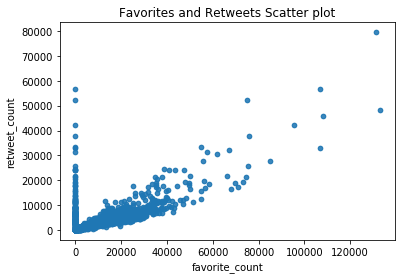

In [50]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.4)
plt.title('Favorites and Retweets Scatter plot')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count');

### Insight Two & visualization

**Golden retriever is the most favourite dog in this dataset**

Text(0,0.5,'breeds')

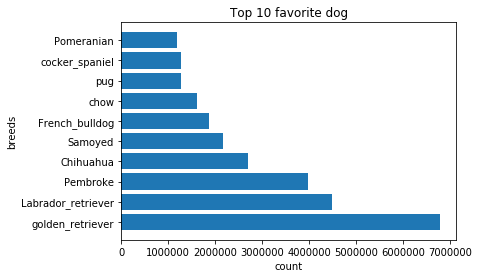

In [61]:
most_fav = df.groupby('p1')['favorite_count'].sum().reset_index()
most_fav= most_fav.sort_values('favorite_count',ascending=False).head(10)
plt.barh(most_fav['p1'], most_fav['favorite_count'])
plt.title('Top 10 favorite dog')
plt.xlabel('count')
plt.ylabel('breeds')

### Insight Three & visualization

**Pupper has the highest rating by 26.0**

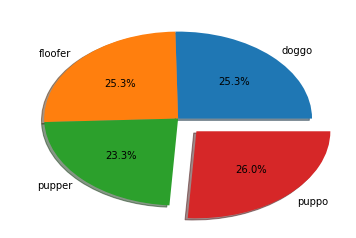

In [73]:
count_stages = df.query('dog_stage != "None"')
count_stages = count_stages.groupby('dog_stage').rating_scale_10.mean().reset_index()
plt.pie(count_stages.rating_scale_10,labels=count_stages.dog_stage,radius=1,autopct='%0.1f%%',explode=[0,0,0,0.2],shadow=True);